In [ ]:
from jupyterthemes import jtplot
jtplot.style(figsize = (15, 10), grid = False, ticks = True)

In [1]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap


In [2]:
cmap_name = 'seismic'
my_cmap = cm.get_cmap(cmap_name, 512)
my_cmap = ListedColormap(my_cmap(np.linspace(0.45, 0.55, 5)))

# Theory

**Assumption**: 
- Similar Inputs have similar outputs

**Classification rule**: 
- For a test input $x$, assign the most common label amongst its $k$ most similar training inputs 

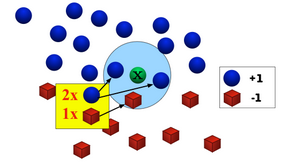

## Curse of Dimensionality

$k$NN assumes similar points share similar labels. In high dimensional space points that are drawn from a probability distribution, tend to never be close together.
- https://www.youtube.com/watch?v=4v7ngaiFdp4 - 5 min  explanation
- https://en.wikipedia.org/wiki/Curse_of_dimensionality
- https://www.youtube.com/watch?v=BbYV8UfMJSA&t - 15-20 min explanation

# Code

## Utils

In [ ]:
def accuracy(y_true, y_pred):
    # Code here

## Class

In [ ]:
def minkowski_distance(x, y, p = 2):
    # Code here

In [11]:
np.unique([5, 3, 4, 4, 5, 5, 6], return_counts=True)

(array([3, 4, 5, 6]), array([1, 2, 3, 1], dtype=int64))

In [12]:
class KNN:
    def __init__(self, k):
        self.X = None
        self.y = None
        self.k = k
    
    
    def fit(self, X, y):
        '''
        Fits the model to the data
        Arguments
            X: ndarray -- data of shape (n_samples, n_features)
            y: ndarray -- labels of shape (n_samples, )
        '''
        self.X  = X
        self.y = y
        
        return self
    
    def predict(self, X):
        '''
        Arguments
            X: ndarray -- data of shape (n_samples, n_features)
        Returns:
            y_pred: ndarray -- predicted values of shape (n_samples, )
        '''
        assert self.X is not None and self.y is not None, "Fit the model first"
        
        distances = cdist(X, self.X) # Take the distances between the new points X and the already known points
        y_pred = np.zeros(X.shape[0]) # Make a list of 0 of dimension (n_samples)
        
        #iterate through each sample
        for (i, di) in enumerate(distances):
            closest_idxs = np.argsort(di)[:self.k]
            possible_labels, counts = np.unique(self.y[closest_idxs], return_counts = True)
            y_pred[i] = possible_labels[np.argmax(counts)] # take the idx that gives the max counts and return the label at that index
        
        return y_pred
        

# Compare

In [13]:
k = 5

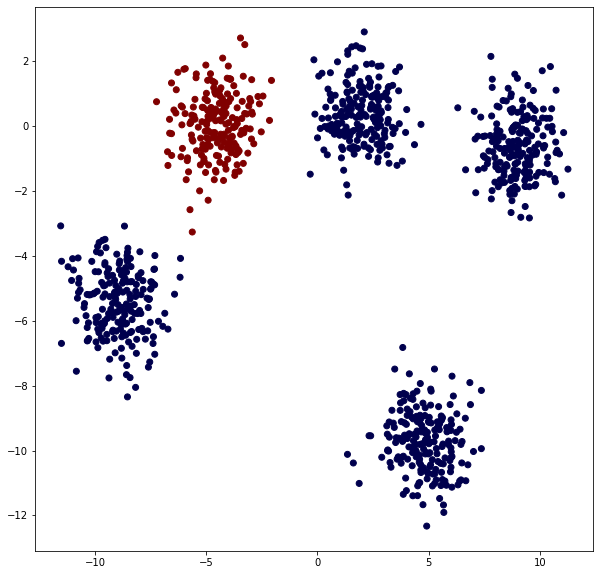

In [15]:
# Generate data
X, y = make_blobs(n_samples=1000, centers=5, n_features=2, random_state=170) #random state 0 or 5 for mixed, 1, 2, 170 for cool
y = np.array([1 if yi == 1 else -1 for yi in y])

# Code: Scatter plot to look at data
plt.figure(figsize = (10, 10))
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap_name)

In [16]:
# Fit the data
knn = KNN(k)
knn.fit(X, y)
y_pred = knn.predict(X)

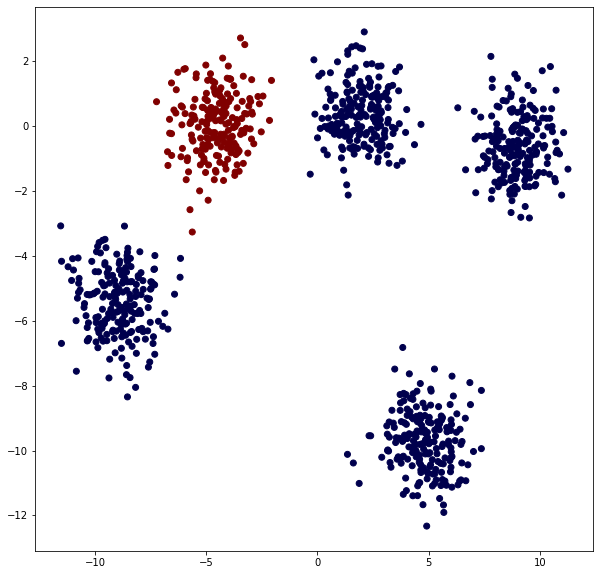

In [17]:
# Prediction scatter plot
plt.figure(figsize = (10, 10))
plt.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = cmap_name)

## Plot decision boundary

Text(0.5, 1.0, 'knn')

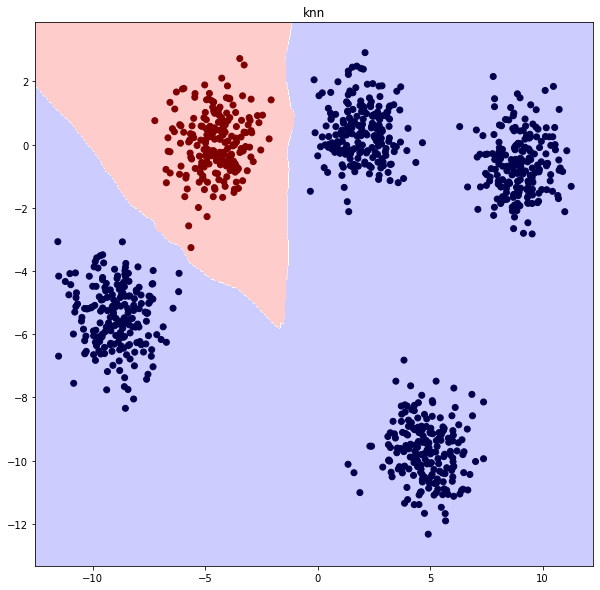

In [18]:
h = 0.05
#https://stats.stackexchange.com/questions/71335/decision-boundary-plot-for-a-perceptron
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots( figsize = (10, 10))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=my_cmap)
#ax.contourf(xx, yy, Z, colors = ['blue, red'])
#ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=y_pred, cmap = cmap_name)
ax.set_title('knn')

## Moons

In [20]:
# Generate data
X, y = make_moons(n_samples=500,  random_state=170, noise = 0.15) #random state 0 or 5 for mixed, 1, 2, 170 for cool
y = np.array([1 if yi == 1 else -1 for yi in y])

# Scatter plot the data

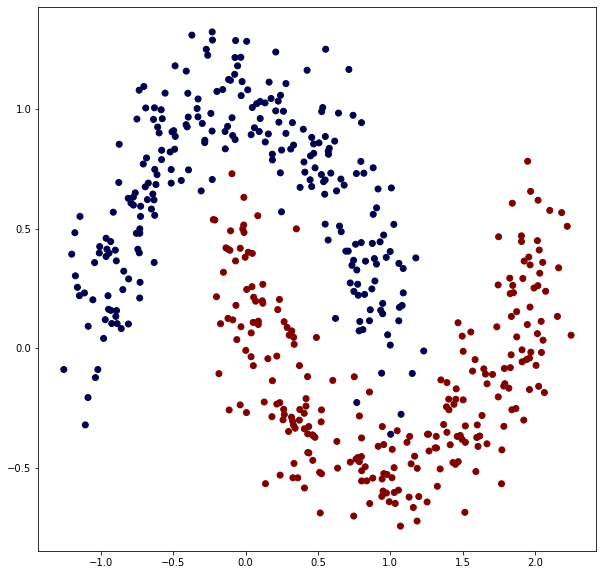

In [22]:
# Prediction scatter plot
plt.figure(figsize = (10, 10))
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap_name)

In [23]:
# Fit the data
knn = KNN(k)
knn.fit(X, y)
y_pred = knn.predict(X)

Text(0.5, 1.0, 'knn moons')

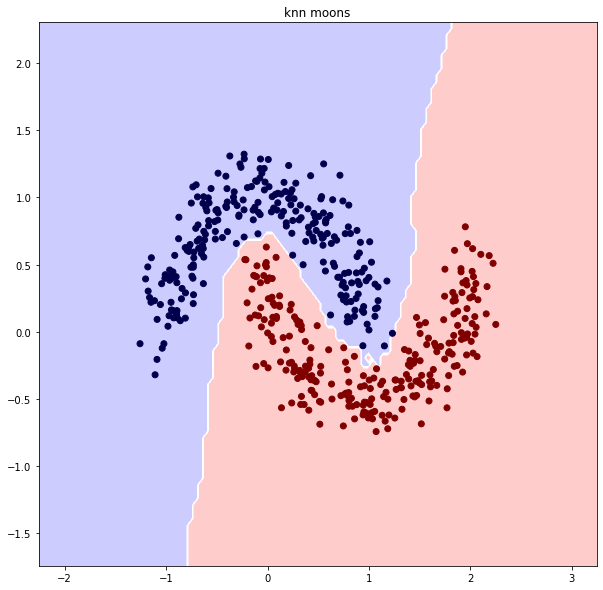

In [24]:
h = 0.05
#https://stats.stackexchange.com/questions/71335/decision-boundary-plot-for-a-perceptron
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots( figsize = (10, 10))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=my_cmap)
#ax.contourf(xx, yy, Z, colors = ['blue, red'])
#ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=y_pred, cmap = cmap_name)
ax.set_title('knn moons')

## More classes

https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [25]:
cmap_name = 'viridis'
my_cmap = cm.get_cmap(cmap_name, 512)
my_cmap = ListedColormap(my_cmap(np.linspace(0.45, 0.55, 255)))

In [26]:
from sklearn.datasets import make_classification

In [27]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_classes=4, n_clusters_per_class=1, n_redundant=0, n_repeated=0, random_state=3) # 3 is fine

# Scatter plot the data

In [34]:
# Fit predict
k = 1
knn = KNN(k)
knn.fit(X, y)
y_pred = knn.predict(X)

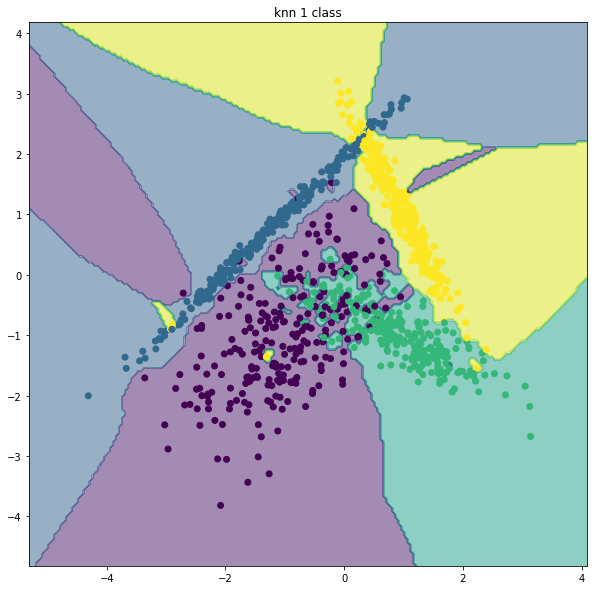

In [35]:
h = 0.05
#https://stats.stackexchange.com/questions/71335/decision-boundary-plot-for-a-perceptron
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots( figsize = (10, 10))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cmap_name, alpha = .5)
#ax.contourf(xx, yy, Z, colors = ['blue, red'])
#ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=y_pred, cmap = cmap_name)
ax.set_title(f'knn {k} class')
plt.show()